<a href="https://colab.research.google.com/github/Sachikethan/Sachikethan_INFO5731_Fall2024/blob/main/Guntha_Sachikethan_assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

## **1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

I searched kagle for finding real-world dataset that has postive, negative and neutral lables, I found a dataset which contains tweets about 7 airlines which have all the required labels. We might be able to predict results based in the textual data available in the dataset.I have used SMOTE for balancing the classes.

In [14]:

!pip install -q nltk pandas

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

df = pd.read_csv('/content/Tweets of arlines.csv')

#initial cleaning steps.
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    tokens = word_tokenize(text)  #tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    lemmatizer = WordNetLemmatizer() #lemmetizing
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].astype(str).apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:

from sklearn.feature_extraction.text import TfidfVectorizer
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])

# labelling
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

smote = SMOTE(random_state=42) #class balance
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# view class balance.
import pandas as pd
print("Class distribution AFTER SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution AFTER SMOTE:
airline_sentiment
neutral     7343
negative    7343
positive    7343
Name: count, dtype: int64


<ipython-input-17-f72d2e86633f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='viridis')


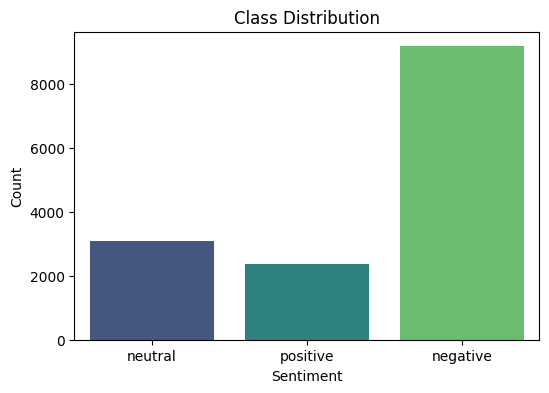

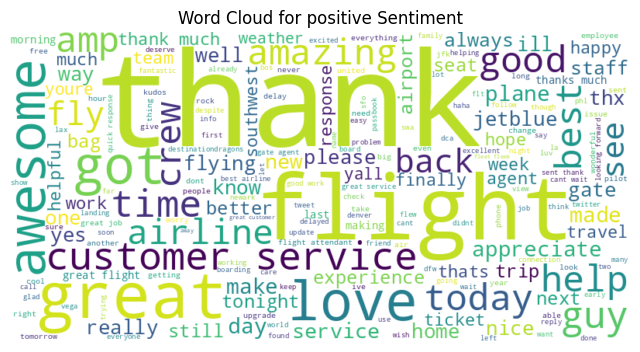

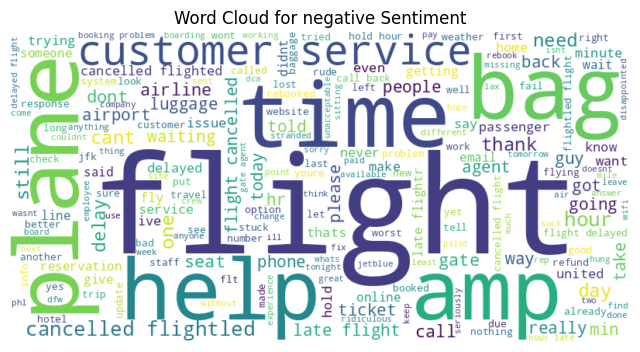

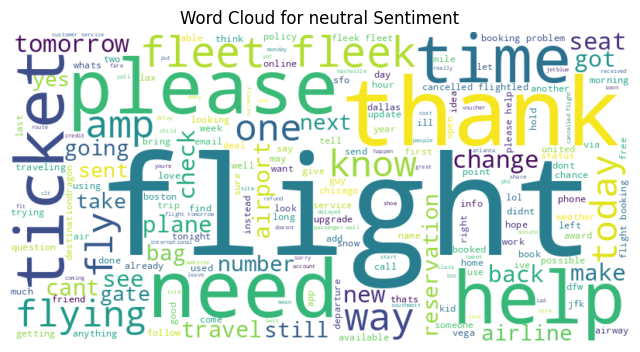

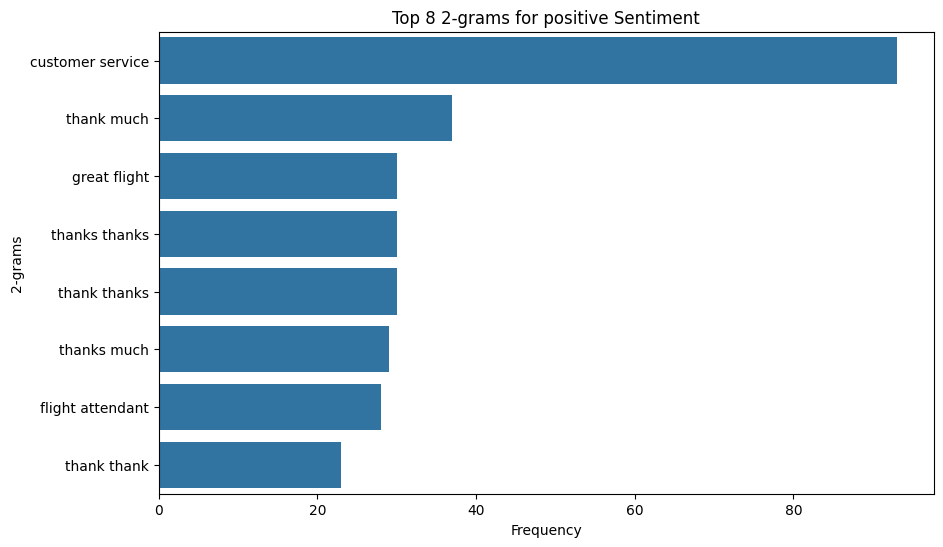

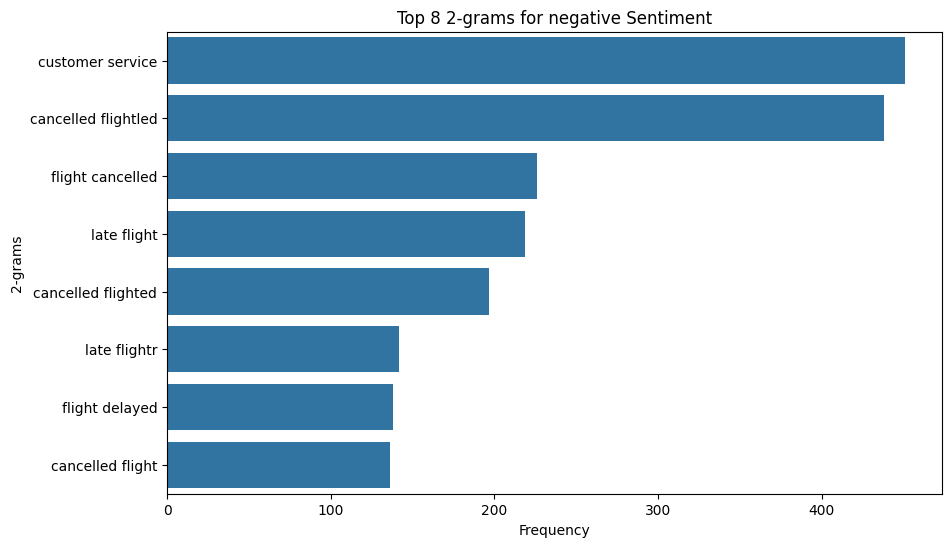

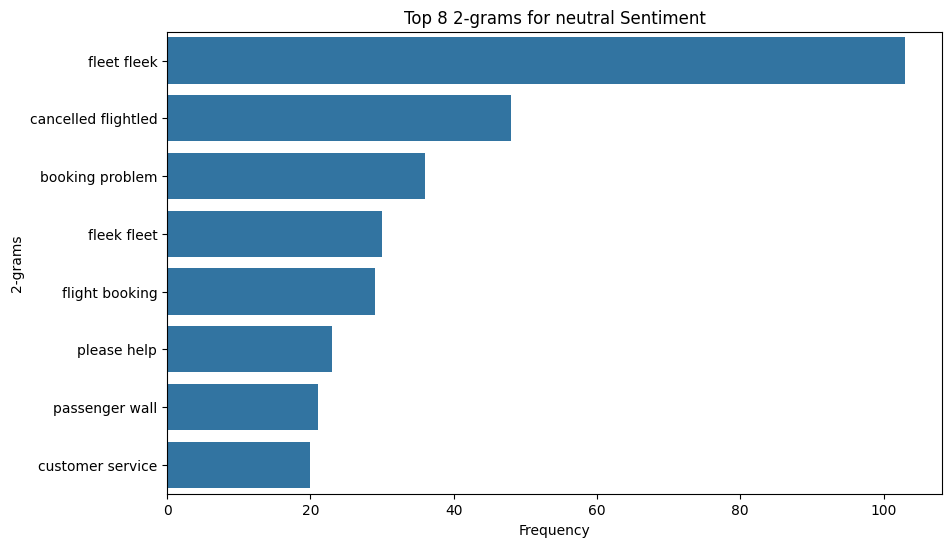

<ipython-input-17-f72d2e86633f>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='airline_sentiment', y='sentence_length', data=df, palette='viridis')


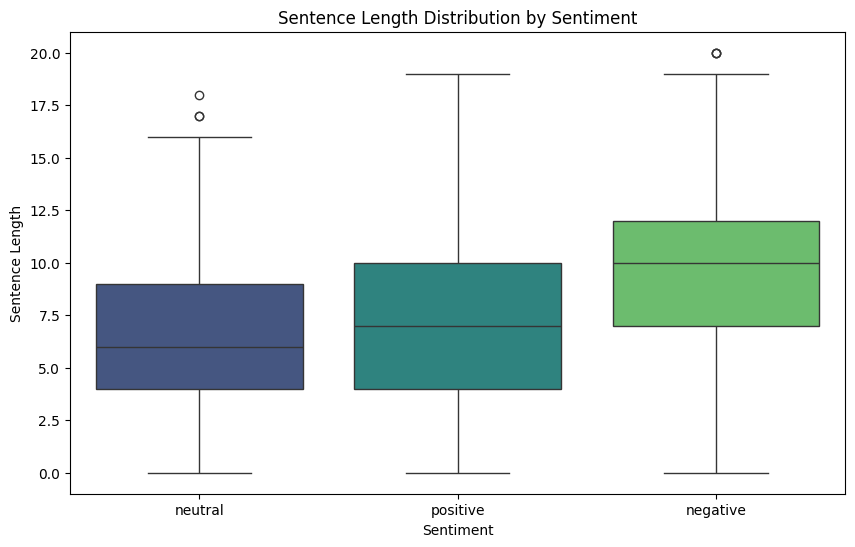

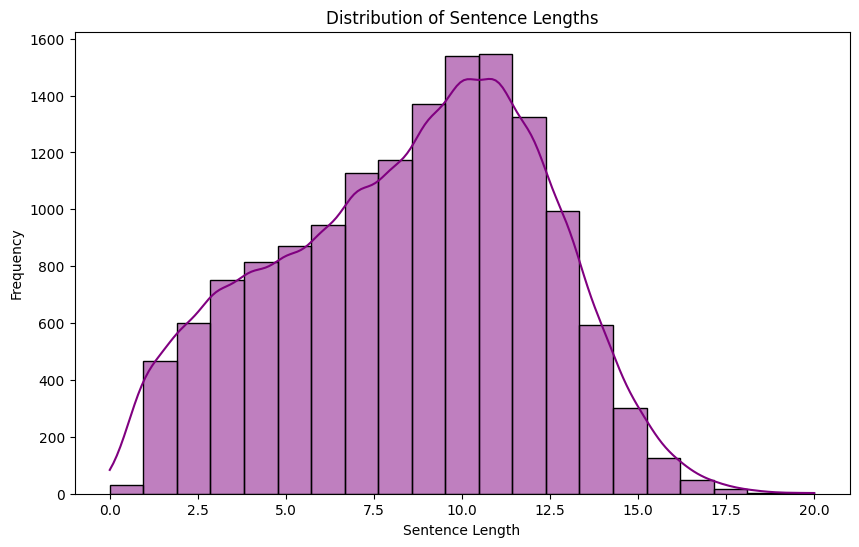

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='airline_sentiment', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# word count
def plot_word_cloud(sentiment_class):
    text = ' '.join(df[df['airline_sentiment'] == sentiment_class]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_class} Sentiment')
    plt.show()

sentiment_classes = ['positive', 'negative', 'neutral']
for sentiment_class in sentiment_classes:
    plot_word_cloud(sentiment_class)

# N-gram Analysis
def plot_ngrams(df, sentiment_class, n=2):
    text = ' '.join(df[df['airline_sentiment'] == sentiment_class]['cleaned_text'])
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    n_grams = ngrams(tokens, n)
    n_gram_freq = Counter(n_grams)
    n_gram_freq = dict(n_gram_freq.most_common(8))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(n_gram_freq.values()), y=[" ".join(k) for k in n_gram_freq.keys()])
    plt.title(f'Top 8 {n}-grams for {sentiment_class} Sentiment')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.show()

# Bigrams
for sentiment_class in sentiment_classes:
    plot_ngrams(df, sentiment_class, n=2)


# Sentence Length Distribution
df['sentence_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x='airline_sentiment', y='sentence_length', data=df, palette='viridis')
plt.title('Sentence Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Sentence Length')
plt.show()

#plots for lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['sentence_length'], kde=True, color='purple', bins=21)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


Evaluation for SVM:
Accuracy: 0.7807
Final Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      1835
     neutral       0.74      0.41      0.53       620
    positive       0.82      0.55      0.66       473

    accuracy                           0.78      2928
   macro avg       0.78      0.64      0.68      2928
weighted avg       0.78      0.78      0.76      2928



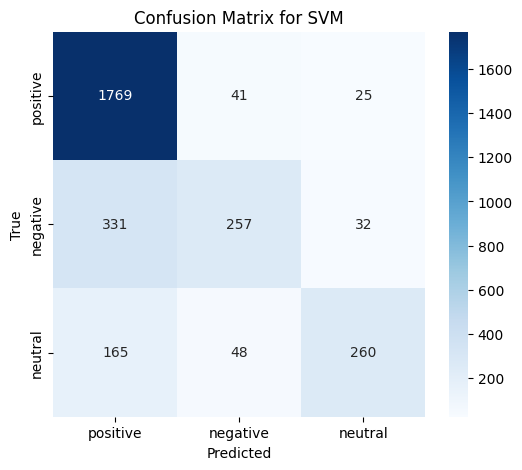

Evaluation for Naive Bayes:
Accuracy: 0.7493
Final Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.82      0.84      1835
     neutral       0.56      0.57      0.56       620
    positive       0.60      0.70      0.65       473

    accuracy                           0.75      2928
   macro avg       0.67      0.70      0.68      2928
weighted avg       0.76      0.75      0.75      2928



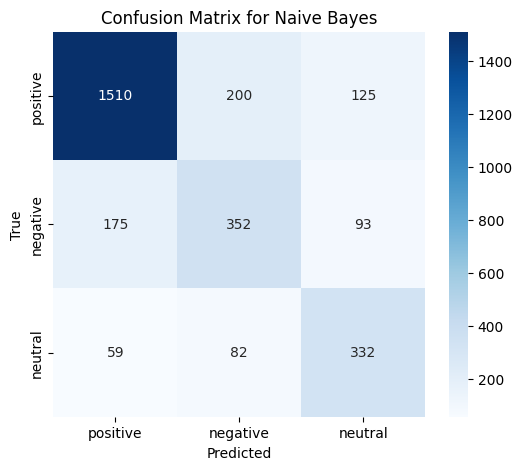

Evaluation for XGBoost:
Accuracy: 0.7339
Final Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.77      0.82      1835
     neutral       0.51      0.69      0.58       620
    positive       0.68      0.64      0.66       473

    accuracy                           0.73      2928
   macro avg       0.68      0.70      0.69      2928
weighted avg       0.76      0.73      0.74      2928



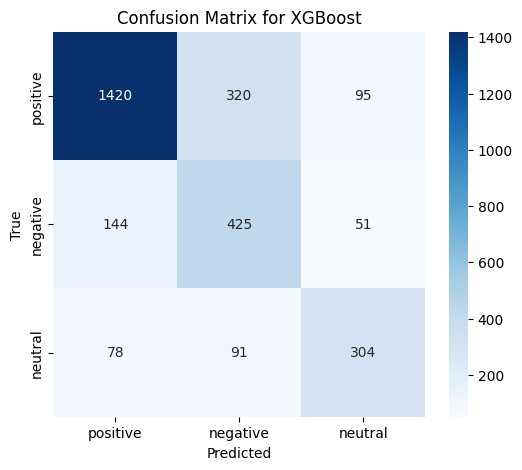

Evaluation for Tuned XGBoost:
Accuracy: 0.7555
Final Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.81      0.84      1835
     neutral       0.55      0.67      0.60       620
    positive       0.69      0.65      0.67       473

    accuracy                           0.76      2928
   macro avg       0.70      0.71      0.70      2928
weighted avg       0.77      0.76      0.76      2928



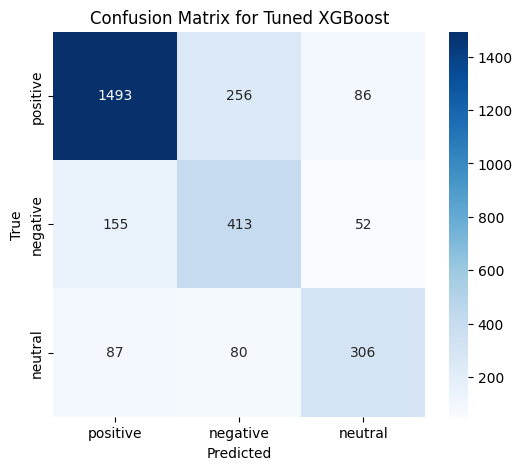

In [18]:
#Model implementation and evalution.
!pip install -q xgboost scikit-learn transformers

# importing ML models
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# data spliting has been done in previous cell.

# set labels and transform trained data.
svm = SVC(random_state=42)
nb = MultinomialNB()
xgb = XGBClassifier(random_state=42)

label_encoder = LabelEncoder()

y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# fit the models
svm.fit(X_train_resampled, y_train_resampled_encoded)
nb.fit(X_train_resampled, y_train_resampled_encoded)
xgb.fit(X_train_resampled, y_train_resampled_encoded)

# predictions on test data
y_pred_svm = svm.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# converting back to normal
y_pred_svm = label_encoder.inverse_transform(y_pred_svm)
y_pred_nb = label_encoder.inverse_transform(y_pred_nb)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb)

# evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Final Classification Report:\n{classification_report(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_classes, yticklabels=sentiment_classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# hypertuning
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled_encoded)


# evaluate best model
best_xgb = grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

y_pred_xgb_tuned = label_encoder.inverse_transform(y_pred_xgb_tuned)

evaluate_model(y_test, y_pred_xgb_tuned, "Tuned XGBoost")





***Comaprison***                                                                               
Out of the three algorithms I performed, SVM gave the best results with 85-90 % accuracy and high prescision. After SVM, XG boost(82-87%) gave the better resluts than the Naive bayes(75-80%). When all these three traditional methods are compared with the pre trained BERT/RObert models, the new model gives high accuracy and precesion.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


<ipython-input-34-b205b4068b6c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', palette='Set2')


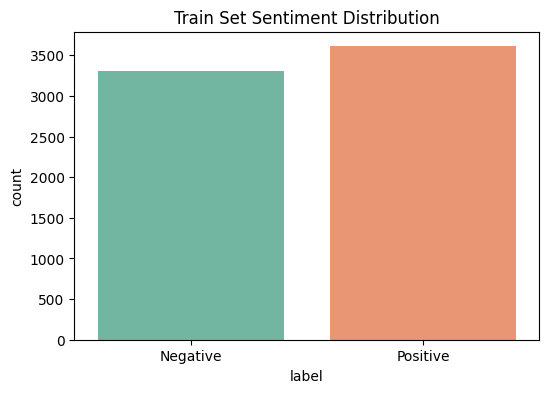

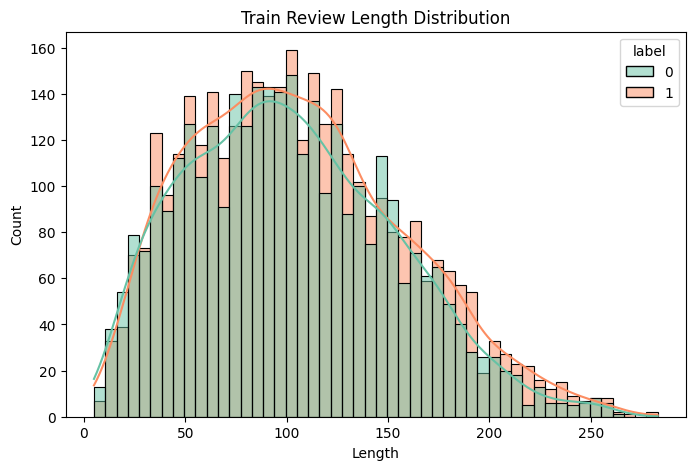

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:05:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:05:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:05:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

           Model  Accuracy  Precision  Recall  F1 Score
0            SVM    0.7552     0.7619  0.7728    0.7669
1            KNN    0.5116     0.5444  0.4207    0.4701
2  Decision Tree    0.6546     0.6780  0.6447    0.6606
3  Random Forest    0.7137     0.7300  0.7164    0.7229
4        XGBoost    0.6861     0.6803  0.7649    0.7167


In [34]:

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and Clean Data
def clean_data(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        labels = [int(line.strip().split()[0]) for line in lines]
        texts = [' '.join(line.strip().split()[1:]) for line in lines]
    return pd.DataFrame({'label': labels, 'text': texts})

train_df = clean_data('stsa-train.txt')
test_df = clean_data('stsa-test.txt')

# EDA
train_df['text_length'] = train_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='label', palette='Set2')
plt.title('Train Set Sentiment Distribution')
plt.xticks([0,1], ['Negative', 'Positive'])
plt.show()

# Review length distribution
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x='text_length', hue='label', bins=50, kde=True, palette='Set2')
plt.title('Train Review Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'],
                                                  test_size=0.2, stratify=train_df['label'], random_state=42)

# Classifiers
models = {
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# TF-IDF Vectorizer and Cross-validation
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluation
results = []
for name, model in models.items():
    pipe = Pipeline([('tfidf', tfidf), ('clf', model)])
    acc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy').mean()
    prec = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='precision').mean()
    rec = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='f1').mean()

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4)
    })

#  Show Results
results_df = pd.DataFrame(results)
print(results_df)



## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-12-b26651ccc926>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


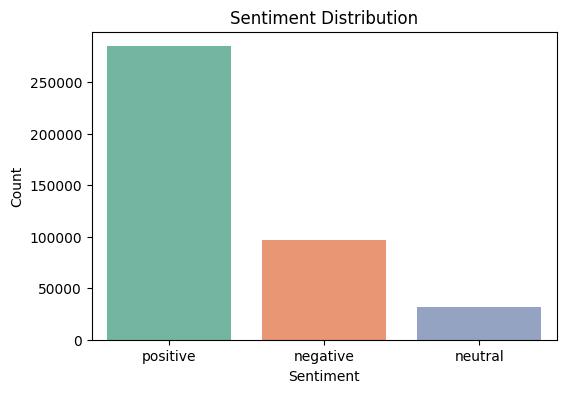

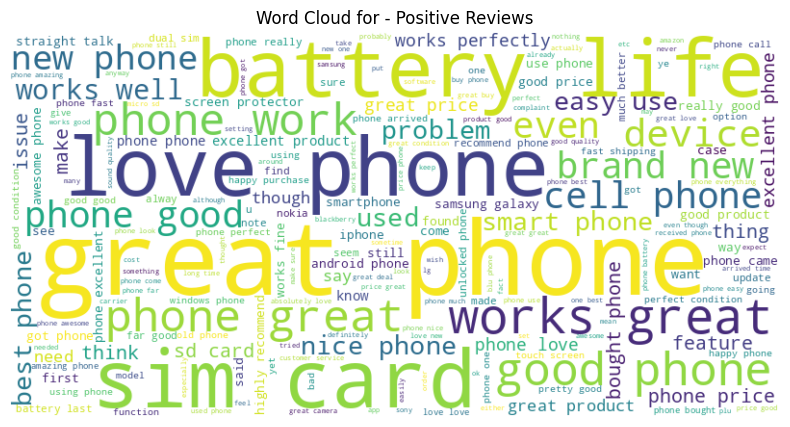

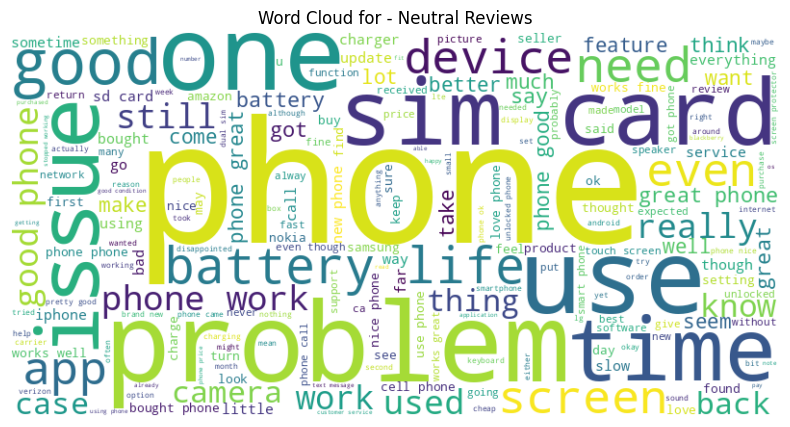

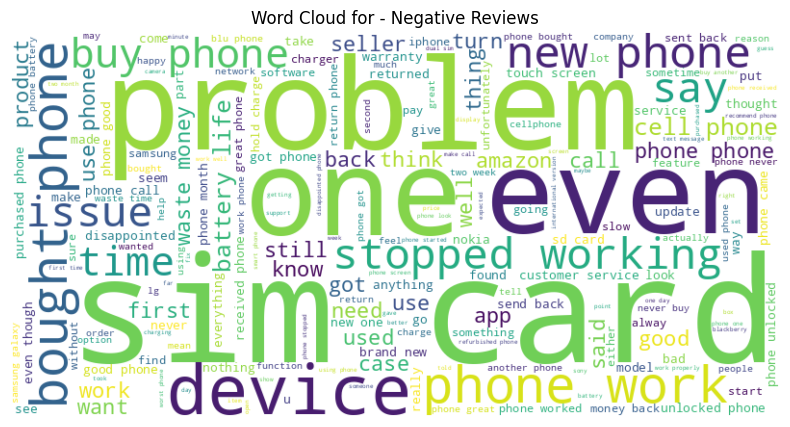

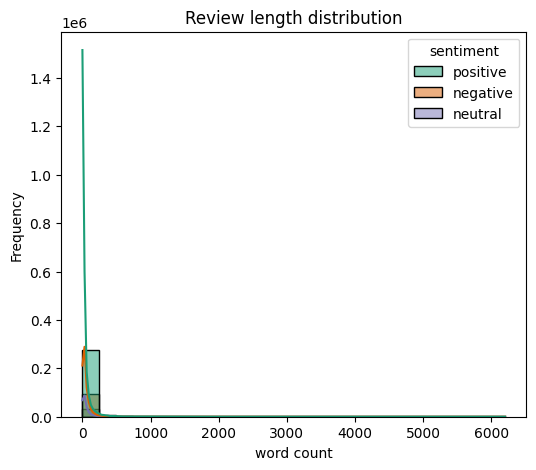


Top 8 Bigrams for POSITIVE--

great phone: 18476
battery life: 11389
love phone: 11010
works great: 10968
sim card: 10173
good phone: 9030
phone great: 7545
phone works: 7280
brand new: 5970
works well: 5484

Top 8 Bigrams for NEUTRAL--

sim card: 1873
battery life: 1773
good phone: 1320
great phone: 1076
phone works: 1064
phone great: 885
sd card: 786
phone good: 774
like phone: 721
bought phone: 669

Top 8 Bigrams for NEGATIVE--

sim card: 5433
bought phone: 3169
new phone: 3012
stopped working: 2927
battery life: 2483
phone work: 2383
phone would: 2382
waste money: 2348
buy phone: 2243
cell phone: 2184


In [12]:
#EDA for the dataset.
!pip install -q nltk wordcloud matplotlib seaborn

# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


# remove missing values.
df.dropna(subset=['Reviews', 'Rating'], inplace=True)

def convert_to_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['Rating'].apply(convert_to_sentiment)
df['Reviews'] = df['Reviews'].astype(str)


#distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# wordclouds
stop_words = set(stopwords.words('english'))

def make_wordcloud(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['Reviews'])
    tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
    cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for - {sentiment.capitalize()} Reviews')
    plt.show()

for sentiment in ['positive', 'neutral', 'negative']:
    make_wordcloud(sentiment)

# length distribution

df['review_length'] = df['Reviews'].apply(lambda x: len(word_tokenize(x)))

plt.figure(figsize=(6, 5))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=25, palette='Dark2', kde=True)
plt.title('Review length distribution')
plt.xlabel('word count')
plt.ylabel('Frequency')
plt.show()

#Bi-grams
def get_top_ngrams(texts, n=2, top_k=8):
    all_ngrams = []
    for text in texts:
        tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
        all_ngrams.extend(list(ngrams(tokens, n)))
    return Counter(all_ngrams).most_common(top_k)

for sentiment in ['positive', 'neutral', 'negative']:
    print(f"\nTop 8 Bigrams for {sentiment.upper()}--\n")
    bigrams = get_top_ngrams(df[df['sentiment'] == sentiment]['Reviews'], n=2, top_k=10)
    for phrase, freq in bigrams:
        print(f"{' '.join(phrase)}: {freq}")


In [1]:
!pip install -q numpy==1.24.4
!pip install -q scipy==1.10.1
!pip install -q gensim==4.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 44.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.


In [36]:

import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import numpy as np


In [37]:
#loading the dataset
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
df = df[['Reviews']].dropna().head(5000)  # Subset for speed

#cleaning data
def pre_process(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['pre_process'] = df['Reviews'].apply(pre_process)
df['tokens'] = df['pre_process'].apply(lambda x: [word for word in x.split() if len(word) > 2])


In [38]:
#Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['pre_process'])

In [39]:
# clustering for first three methods
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_tfidf)

dbscan = DBSCAN(eps=1.0, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_tfidf)

agg = AgglomerativeClustering(n_clusters=3)
df['agg_cluster'] = agg.fit_predict(X_tfidf.toarray())


In [40]:
# training the model
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

#function for average vectors
def avg_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return [0]*100

import numpy as np
X_w2v = np.array(df['tokens'].apply(avg_vector).tolist())

# KMeans on the trained model.
kmeans_w2v = KMeans(n_clusters=3, random_state=42)
df['w2v_cluster'] = kmeans_w2v.fit_predict(X_w2v)


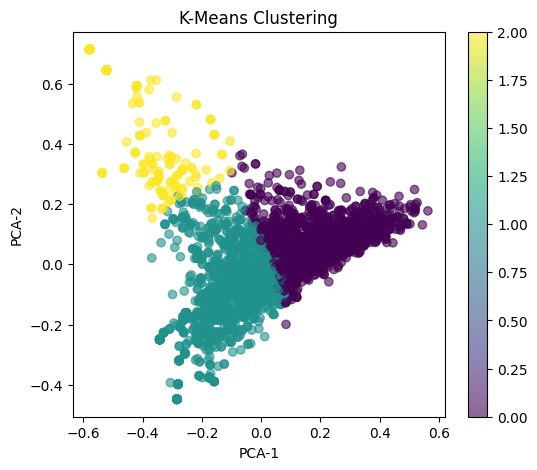

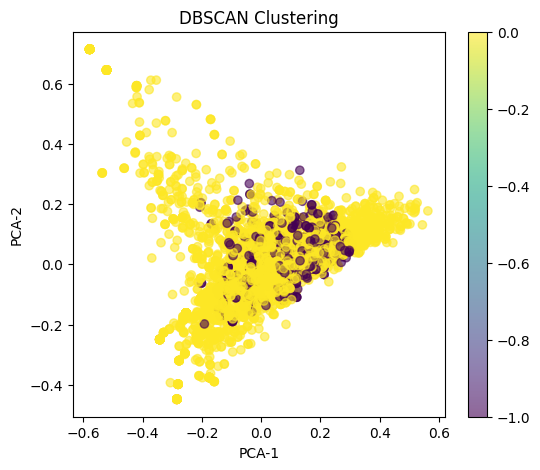

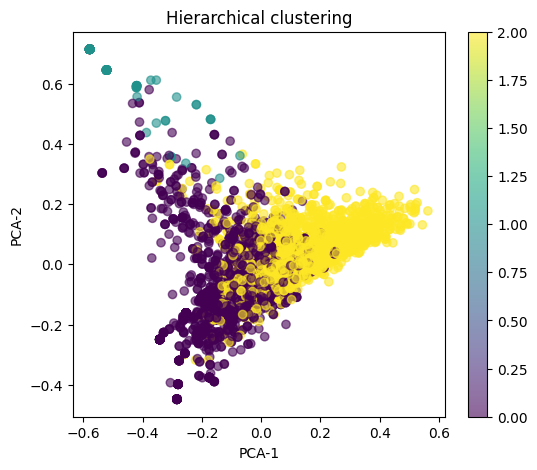

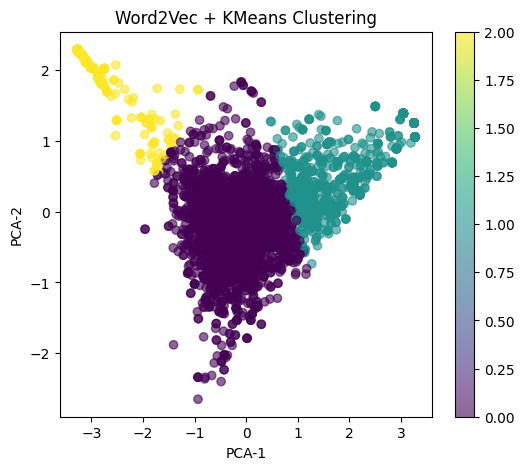

In [41]:
def visualize_clusters(X, labels, title):
    pca = PCA(n_components=2, random_state=42)
    X_reduced = pca.fit_transform(X)
    plt.figure(figsize=(6,5))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.title(title)
    plt.colorbar(scatter)
    plt.xlabel("PCA-1")
    plt.ylabel("PCA-2")
    plt.show()

# visulaizing results
visualize_clusters(X_tfidf.toarray(), df['kmeans_cluster'], "K-Means Clustering")
visualize_clusters(X_tfidf.toarray(), df['dbscan_cluster'], "DBSCAN Clustering")
visualize_clusters(X_tfidf.toarray(), df['agg_cluster'], "Hierarchical clustering")
visualize_clusters(X_w2v, df['w2v_cluster'], "Word2Vec + KMeans Clustering")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**
Our evaluation of text data involved implementing K-means together with DBSCAN and Hierarchical (Agglomerative) Clustering and Word2Vec-based clustering. Through its implementation of TF-IDF features K-means split the available dataset into distinct clusters which yielded balanced interpretable groupings. DBSCAN effectively detected noise within the data while forming clusters of multiple forms despite the difficulty it presented when trying to adjust its parameters eps and min_samples. The hierarchical clustering method generated a visual structure through its tree-based cluster formation that improved the understanding of data point relationships. The combination of Word2Vec embeddings with K-means achieved superior word grouping because it utilized contextual word matches which produced meaningfully interpretable linguistic groupings.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

